# 0.0 - Imports

In [12]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics as mt
from sklearn.tree import DecisionTreeRegressor

In [13]:
warnings.filterwarnings("ignore")

# 1.0 - Load Data

In [14]:
# Train Dataset
X_train = pd.read_csv("../data/regression_X_training.csv")
y_train = pd.read_csv("../data/regression_y_training.csv")

# Validation Dataset
X_val = pd.read_csv("../data/regression_X_validation.csv")
y_val = pd.read_csv("../data/regression_y_validation.csv")

# Test Dataset
X_test = pd.read_csv("../data/regression_X_test.csv")
y_test = pd.read_csv("../data/regression_y_test.csv")

# 2.0 - Decision Tree

## Parameteres:
- `max_depth`

## 2.1 - Performance for Train Dataset

In [15]:
# Train and Fit Model
decision_tree_train = DecisionTreeRegressor(random_state=42)
decision_tree_train.fit(X_train, y_train)

# Predict
y_pred_train = decision_tree_train.predict(X_train)

# Performance Metrics
r2_train = mt.r2_score(y_train, y_pred_train)
mse_train = mt.mean_squared_error(y_train, y_pred_train)
rmse_train = mt.mean_squared_error(y_train, y_pred_train, squared=False)
mae_train = mt.mean_absolute_error(y_train, y_pred_train)
mape_train = mt.mean_absolute_percentage_error(y_train, y_pred_train)

print(f"Train R2: {r2_train}")
print(f"Train MSE: {mse_train}")
print(f"Train RMSE: {rmse_train}")
print(f"Train MAE: {mae_train}")
print(f"Train MAPE: {mape_train}")

Train R2: 0.9917566957405923
Train MSE: 3.940402971731975
Train RMSE: 1.9850448286454327
Train MAE: 0.21409852496986279
Train MAPE: 0.08262787375974134


## 2.2 - Performance for Validation Dataset

In [16]:
# Define Model
decision_tree_val = DecisionTreeRegressor(random_state=42)
decision_tree_val.fit(X_train, y_train)

# Predict
y_pred_val = decision_tree_val.predict(X_val)

# Performance Metrics
r2_val = mt.r2_score(y_val, y_pred_val)
mse_val = mt.mean_squared_error(y_val, y_pred_val)
rmse_val = mt.mean_squared_error(y_val, y_pred_val, squared=False)
mae_val = mt.mean_absolute_error(y_val, y_pred_val)
mape_val = mt.mean_absolute_percentage_error(y_val, y_pred_val)

print(f"Validation R2: {r2_val}")
print(f"Validation MSE: {mse_val}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation MAE: {mae_val}")
print(f"Validation MAPE: {mape_val}")

Validation R2: -0.30391776516619506
Validation MSE: 622.6358739032412
Validation RMSE: 24.95267268056152
Validation MAE: 17.166615476980443
Validation MAPE: 6.941831785416537


## 2.3 - Hyperparameter Fine Tuning

In [17]:
max_depth = np.arange(2, 31, 1)

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [18]:
for i in max_depth:
    # Define Model
    decision_tree_tuning = DecisionTreeRegressor(random_state=42, max_depth=i)
    decision_tree_tuning.fit(X_train, y_train)

    # Predict
    y_pred = decision_tree_tuning.predict(X_val)

    # Performance Metrics
    r2 = mt.r2_score(y_val, y_pred)
    mse = mt.mean_squared_error(y_val, y_pred)
    rmse = mt.mean_squared_error(y_val, y_pred, squared=False)
    mae = mt.mean_absolute_error(y_val, y_pred)
    mape = mt.mean_absolute_percentage_error(y_val, y_pred)

    r2_list.append(r2)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)

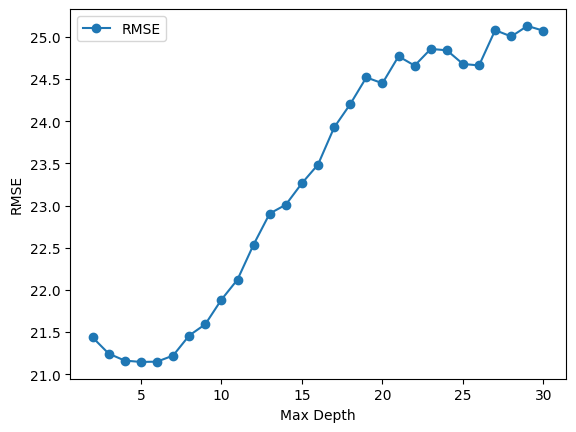

In [19]:
plt.plot(max_depth, rmse_list, marker="o", label="RMSE")
plt.xlabel("Max Depth")
plt.ylabel("RMSE")
plt.legend()

In [20]:
best_depth = max_depth[np.argmin(rmse_list)]
best_depth

5

## 2.4 - Performance for Test Dataset

In [21]:
# Define Model
decision_tree_test = DecisionTreeRegressor(random_state=42, max_depth=best_depth)
decision_tree_test.fit(
    np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val))
)

# Predict
y_pred_test = decision_tree_test.predict(X_test)

# Performance Metrics
r2_test = mt.r2_score(y_test, y_pred_test)
mse_test = mt.mean_squared_error(y_test, y_pred_test)
rmse_test = mt.mean_squared_error(y_test, y_pred_test, squared=False)
mae_test = mt.mean_absolute_error(y_test, y_pred_test)
mape_test = mt.mean_absolute_percentage_error(y_test, y_pred_test)

print(f"Test R2: {r2_test}")
print(f"Test MSE: {mse_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test MAE: {mae_test}")
print(f"Test MAPE: {mape_test}")

Test R2: 0.09047547149696622
Test MSE: 442.84838052138286
Test RMSE: 21.043963042197703
Test MAE: 16.82978094998882
Test MAPE: 7.883226145162678


# 3.0 - Final Results

In [22]:
train_metrics = {
    "Algorithm": "Decision Tree - Regressor",
    "R-Squared": np.round(r2_train, 3),
    "MSE": np.round(mse_train, 3),
    "RMSE": np.round(rmse_train, 3),
    "MAE": np.round(mae_train, 3),
    "MAPE": np.round(mape_train, 3),
}
validation_metrics = {
    "Algorithm": "Decision Tree - Regressor",
    "R-Squared": np.round(r2_val, 3),
    "MSE": np.round(mse_val, 3),
    "RMSE": np.round(rmse_val, 3),
    "MAE": np.round(mae_val, 3),
    "MAPE": np.round(mape_val, 3),
}
test_metrics = {
    "Algorithm": "Decision Tree - Regressor",
    "R-Squared": np.round(r2_test, 3),
    "MSE": np.round(mse_test, 3),
    "RMSE": np.round(rmse_test, 3),
    "MAE": np.round(mae_test, 3),
    "MAPE": np.round(mape_test, 3),
}

pd.DataFrame(train_metrics, index=[0]).to_csv("./reg_train_metrics.csv")
pd.DataFrame(validation_metrics, index=[0]).to_csv("./reg_validation_metrics.csv")
pd.DataFrame(test_metrics, index=[0]).to_csv("./reg_test_metrics.csv")